In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
from mizani.formatters import percent_format, scientific_format
from plotnine import *

warnings.filterwarnings("ignore")

In [2]:
# Current script folder
current_path = os.getcwd()
dirname = "/".join(current_path.split("/")[:-2]) + "/"

# location folders
output = dirname + "da_case_studies/ch03-simulations/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

In [3]:
# Import the prewritten helper functions
from py_helper_functions import *

In [4]:
N = 100000
obs = N

In [5]:
# Bernoulli
bernoulli = pd.DataFrame(
    np.random.RandomState(16460).binomial(1, 0.7, N), columns=["bernoulli"]
)

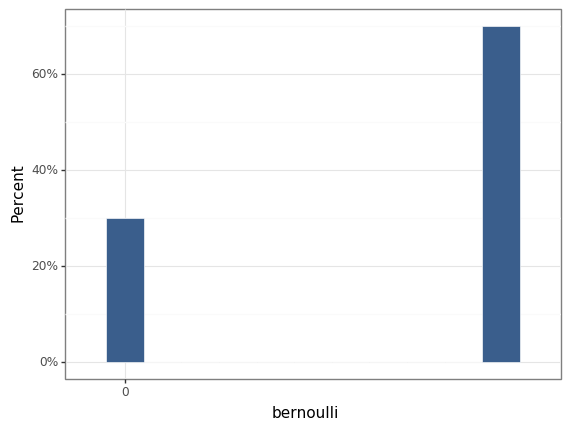

<ggplot: (8729422700945)>

In [6]:
ggplot(
    bernoulli, aes(x="bernoulli", y="stat(count)/sum(stat(count))")
) + geom_histogram(
    binwidth=0.1,
    color="white",
    fill=color[0],
    size=0.25,
    alpha=0.8,
    show_legend=False,
    na_rm=True,
) + labs(
    y="Percent"
) + expand_limits(
    x=0.01, y=0.01
) + scale_x_continuous(
    limits=(-0.1, 1.1), breaks=seq(0, 1, by=1)
) + scale_y_continuous(
    labels=percent_format()
) + theme_bw()

In [7]:
# Binomial
# with smaller sample
Nbinom = 20

binomial = pd.DataFrame(np.random.binomial(Nbinom, 0.4, N), columns=["binomial"])

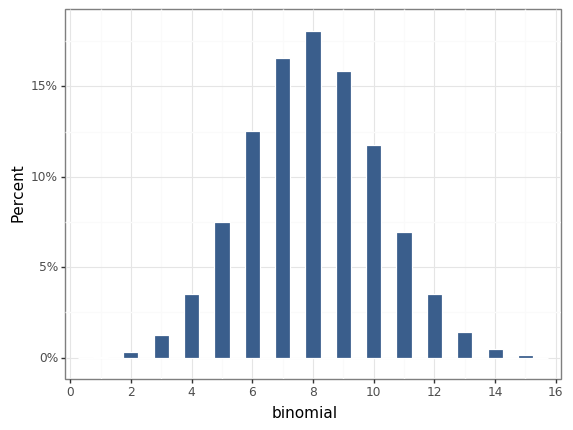

<ggplot: (8729383295558)>

In [8]:
ggplot(binomial, aes(x="binomial", y="stat(count)/sum(stat(count))")) + geom_histogram(
    color="white", fill=color[0], binwidth=0.5
) + labs(y="Percent") + scale_y_continuous(
    expand=(0.01, 0.01), labels=percent_format()
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 16), breaks=seq(0, 16.1, by=2)
) + theme_bw()

In [9]:
# uniform
uniform = pd.DataFrame(np.random.uniform(0, 1, obs), columns=["uniform"])

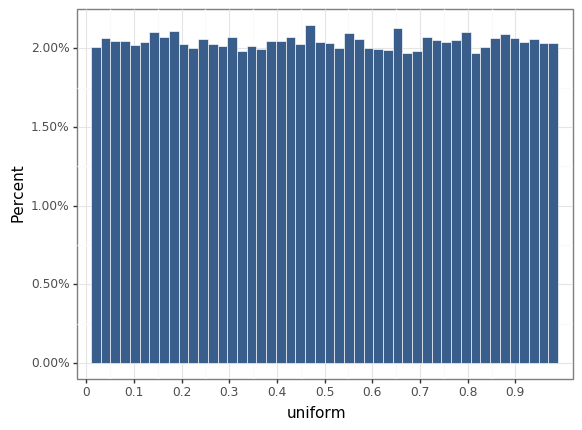

<ggplot: (8729383270271)>

In [10]:
ggplot(uniform, aes(x="uniform", y="stat(count)/sum(stat(count))")) + geom_histogram(
    bins=50,
    center=1,
    color="white",
    fill=color[0],
    size=0.25,
    alpha=0.8,
    show_legend=False,
    na_rm=True,
) + labs(y="Percent") + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 1), breaks=seq(0, 1, by=0.1)
) + scale_y_continuous(
    expand=(0.001, 0.001), labels=percent_format()
) + theme_bw()

In [11]:
# normal
normal = pd.DataFrame(np.random.normal(0, 1, obs), columns=["normal"])

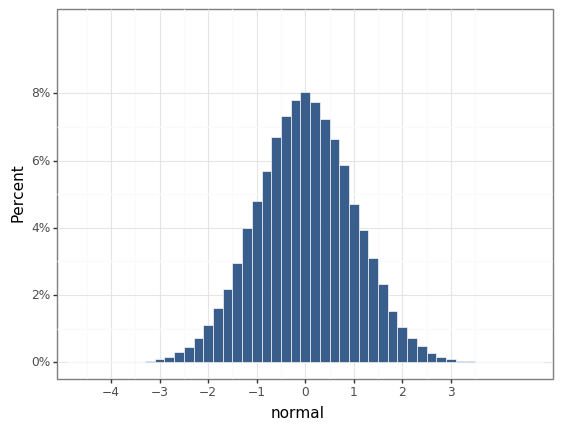

<ggplot: (8729383249869)>

In [12]:
ggplot(normal, aes(x="normal", y="stat(count)/sum(stat(count))")) + geom_histogram(
    binwidth=0.2,
    color="white",
    fill=color[0],
    size=0.25,
    alpha=0.8,
    show_legend=False,
    na_rm=True,
) + labs(y="Percent") + scale_y_continuous(
    labels=percent_format(), limits=(0, 0.1), breaks=seq(0, 0.1, by=0.02)
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(-5, 5), breaks=seq(-4, 4, by=1)
) + expand_limits(
    x=0.01, y=0.01
) + theme_bw()

In [13]:
# lognoromal
# take the exponential of the randomly generated normal above
lognormal = pd.DataFrame(np.exp(normal["normal"]).values, columns=["lognormal"])

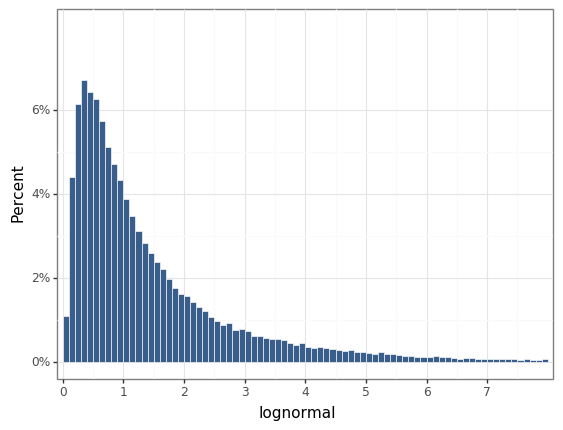

<ggplot: (8729383191059)>

In [14]:
ggplot(
    lognormal.query("lognormal<10"),
    aes(x="lognormal", y="stat(count)/sum(stat(count))"),
) + geom_histogram(
    binwidth=0.1,
    boundary=0.0,
    color="white",
    fill=color[0],
    size=0.25,
    alpha=0.8,
    show_legend=False,
    na_rm=True,
) + labs(
    y="Percent"
) + scale_y_continuous(
    labels=percent_format(), limits=(0, 0.08), breaks=seq(0, 0.08, by=0.02)
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 8), breaks=seq(0, 8, by=1)
) + expand_limits(
    x=0, y=0
) + theme_bw()

In [15]:
# power-law
alpha = 3
xmin = 1
x = seq(1, obs, 1)
X = np.power(x, float(-alpha))
powerlaw = xmin * X
histrange = np.quantile(powerlaw, 0.75)
powerlaw = powerlaw / sum(powerlaw)
powerlaw = pd.DataFrame(powerlaw, columns=["powerlaw"])

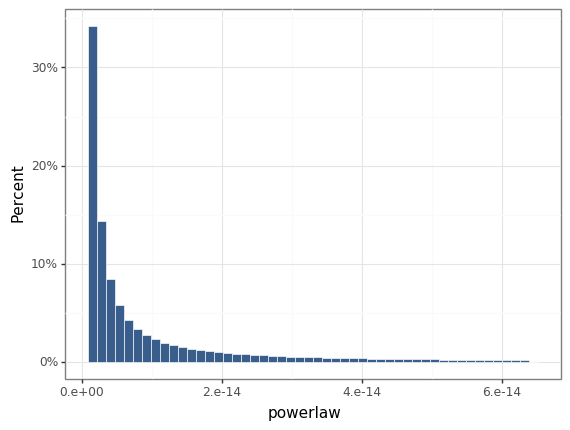

<ggplot: (8729382910603)>

In [16]:
ggplot(
    powerlaw.query("powerlaw < @histrange"),
    aes(x="powerlaw", y="stat(count)/sum(stat(count))"),
) + geom_histogram(
    bins=50,
    boundary=0.5,
    color="white",
    fill=color[0],
    size=0.25,
    alpha=0.8,
    show_legend=False,
    na_rm=True,
) + labs(
    y="Percent"
) + scale_y_continuous(
    labels=percent_format()
) + scale_x_continuous(
    labels=scientific_format()
) + theme_bw()